In [21]:
import sqlite3

# Step 1: Connect to database (creates if not exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Step 3: Insert 5 sample rows
sample_data = [
    ('Laptop', 3, 50000),      # Total = 150000
    ('Mouse', 10, 500),        # Total = 5000
    ('Keyboard', 5, 1500),     # Total = 7500
    ('Monitor', 2, 12000),     # Total = 24000
    ('Headphones', 4, 2000)    # Total = 8000
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Step 4: Commit & close
conn.commit()
#conn.close()

print("Database 'sales_data.db' created with 5 entries.")


Database 'sales_data.db' created with 5 entries.


In [24]:
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""


In [26]:
import pandas as pd

# Run SQL and load results into a DataFrame
df = pd.read_sql_query(query, conn)


In [42]:
print(df)

      product  total_qty   revenue
0  Headphones         12   24000.0
1    Keyboard         15   22500.0
2      Laptop          9  450000.0
3     Monitor          6   72000.0
4       Mouse         30   15000.0


In [44]:
df

,product,total_qty,revenue
0,Headphones,12,24000.0
1,Keyboard,15,22500.0
2,Laptop,9,450000.0
3,Monitor,6,72000.0
4,Mouse,30,15000.0


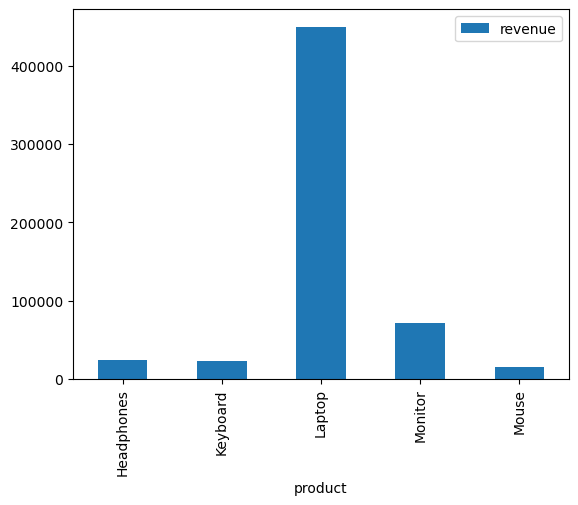

In [30]:
import matplotlib.pyplot as plt

# Create a bar chart
df.plot(kind='bar', x='product', y='revenue')

# Show the plot
plt.show()


In [32]:
plt.savefig("sales_chart.png")


<Figure size 640x480 with 0 Axes>

In [36]:
conn.close()